Train RMSE: 0.37451038314505414
Test RMSE: 2.0866968290698984
Predicted Rating for the new movie: 5.328773208655203


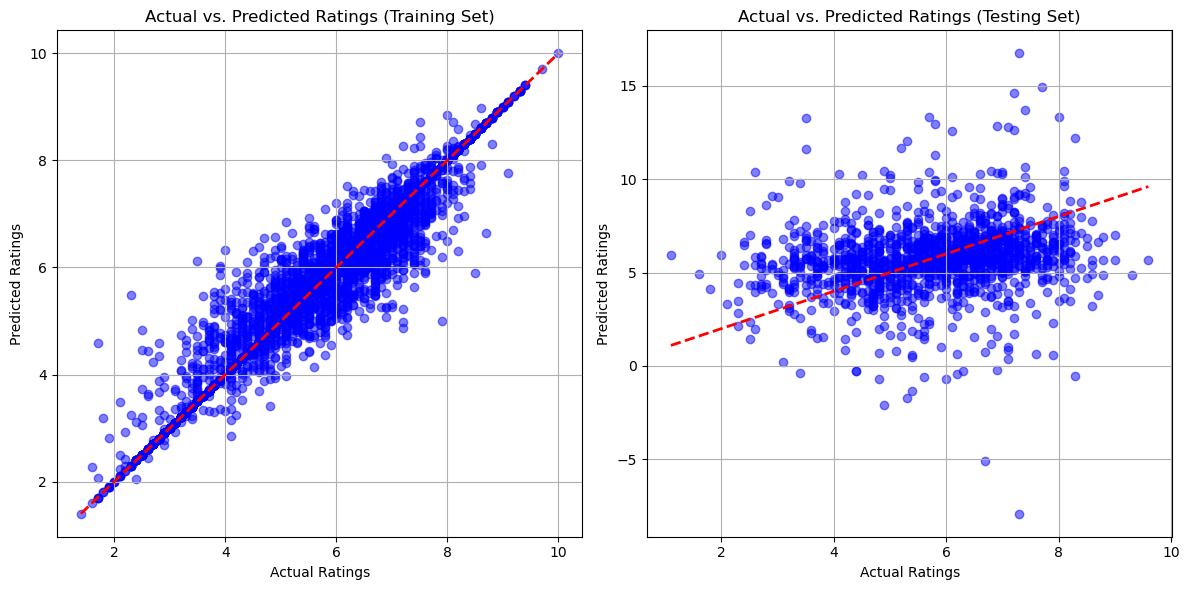

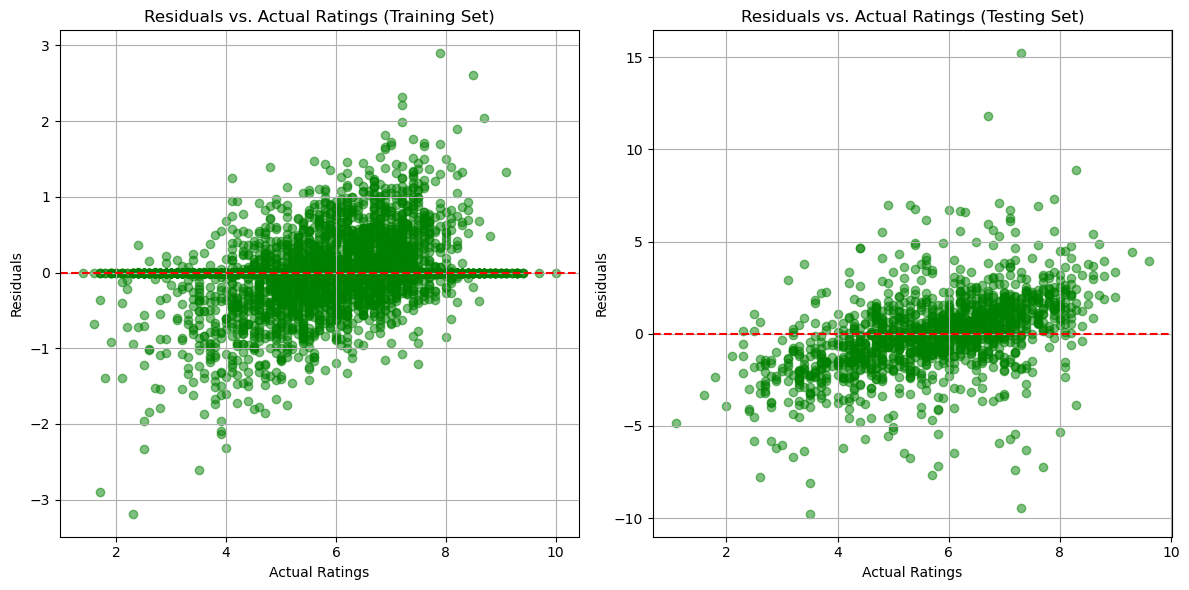

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
movie_data = pd.read_csv(r"C:\Users\haumr\OneDrive\Desktop\IMDb Movies India.csv", encoding='Latin-1')

# Step 2: Preprocess the Data
# Drop rows with missing values in 'Rating', 'Genre', 'Director', 'Actor 1', and 'Actor 2' columns
movie_data.dropna(subset=['Rating', 'Genre', 'Director', 'Actor 1', 'Actor 2'], inplace=True)

# Extract features (Genre, Director, Actor 1, Actor 2) and target variable (Rating)
X = movie_data[['Genre', 'Director', 'Actor 1', 'Actor 2']]
y = movie_data['Rating']

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose a Regression Model and Build a Pipeline
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Actor 1', 'Actor 2'])
    ])

# Combine preprocessing steps with regression model
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred_train = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
print(f"Train RMSE: {train_rmse}")

y_pred_test = model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Test RMSE: {test_rmse}")

# Step 7: Predict Ratings for New Data
# Example new movie data
new_movie = pd.DataFrame({
    'Genre': ['Action'],
    'Director': ['Director X'],
    'Actor 1': ['Actor A'],
    'Actor 2': ['Actor B']
})

# Predict rating for the new movie
predicted_rating = model.predict(new_movie)
print(f'Predicted Rating for the new movie: {predicted_rating[0]}')

# Step 8: Visualize Results
# Calculate residuals (difference between actual and predicted ratings)
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Plot actual vs. predicted ratings for training and testing sets
plt.figure(figsize=(12, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ratings (Training Set)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ratings (Testing Set)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(12, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, residuals_train, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Actual Ratings (Training Set)')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.grid(True)

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_test, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Actual Ratings (Testing Set)')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()